# Analyse des prix des Airbnb de New-York City

Vous êtes Data Analyst chez Airbnb et êtes missionné(e) pour comprendre les données spécifiques à New-York afin de faire les meilleures recommandations. 

Le travail qui vous est demandé contient nécessaire deux parties, mais peut être poussé plus loin en fonction du temps que vous avez et des idées que vous proposez.

- Vous devez faire une "Exploratory Data Analysis" (EDA) complète du jeu de données. 
Plusieurs questions clefs sont mentionnées, n'hésitez pas à apporter vous même un regard neuf sur les données, à faire des analyses complémentaires, à les interpreter et commenter.
- Vous devez produire un modèle prédictif du prix d'un logement Airbnb, ce modèle servira à conseiller au mieux les clients (propriétaires d'appartement) sur le prix qu'ils peuvent proposer à leurs hôtes. 

Votre déliverable contient ce notebook d'analyses ainsi qu'une présentation type powerpoint que vous ferez telle que si vous aviez été en face du Chief Data Officer d'Airbnb (vous aurez 20 minutes + 10 minutes questions). Vous devrez m'envoyer une version presque finie du notebook la veille de votre soutenance à 12h. 

Naturellement, ce notebook doit être commenté et écrit de façon claire et lisible (en respectant au mieux les règles - voir sur en ligne - pour écrire proprement du code). 

## Données 

### Packages 

Structurez votre code en regroupant tous les packages utilisés ici. Cela permet notamment d'installer les packages manquant avec '!pip install' dès le début du notebook si besoin.

In [1]:
#!pip install pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

### Téléchargement 

Les données peuvent être téléchargées avec le lien suivant :
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

Elles doivent être décompressées, puis placées dans le répertoire contenant ce notebook.

Elles contiennent un fichier CSV "AB_NYC_2019.csv" ainsi qu'une carte de NYC "New_York_City_.png" vous permettant de représenter graphiquement certaines de vos analyses.

In [5]:
AB_NYC_2019 = pd.read_csv("AB_NYC_2019.csv")

In [6]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


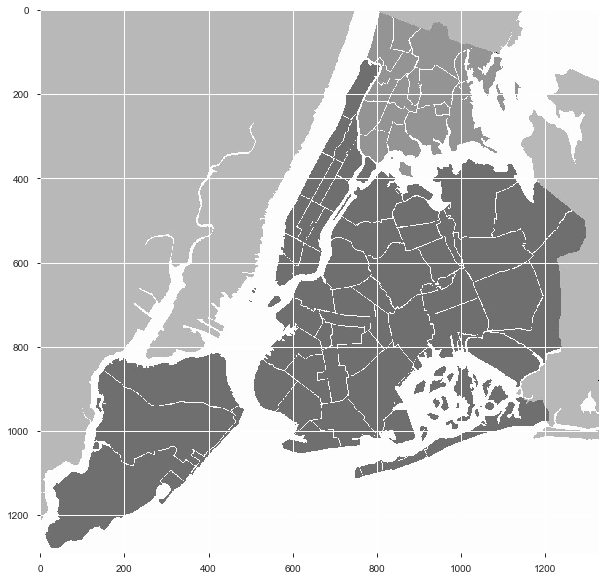

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.imshow(nyc)
plt.show()

### Transformations 

Vous pouvez transformer les données comme bon vous semble (Data Cleaning - Data Preparation).

import pandas_profiling
AB_NYC_2019.profile_report(style={'full_width':True})

## Exploratory Data Analysis

### Questions requises

Pour chacune de ces questions, il vous est demandé d'analyser finement et de conserver et commenter les analyses / graphiques qui vous semblent pertinents.

#### Description des variables

Analysez et commentez les distributions des valeurs prises par les variables catégorielles et quantitatives.

In [9]:
AB_NYC_2019.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

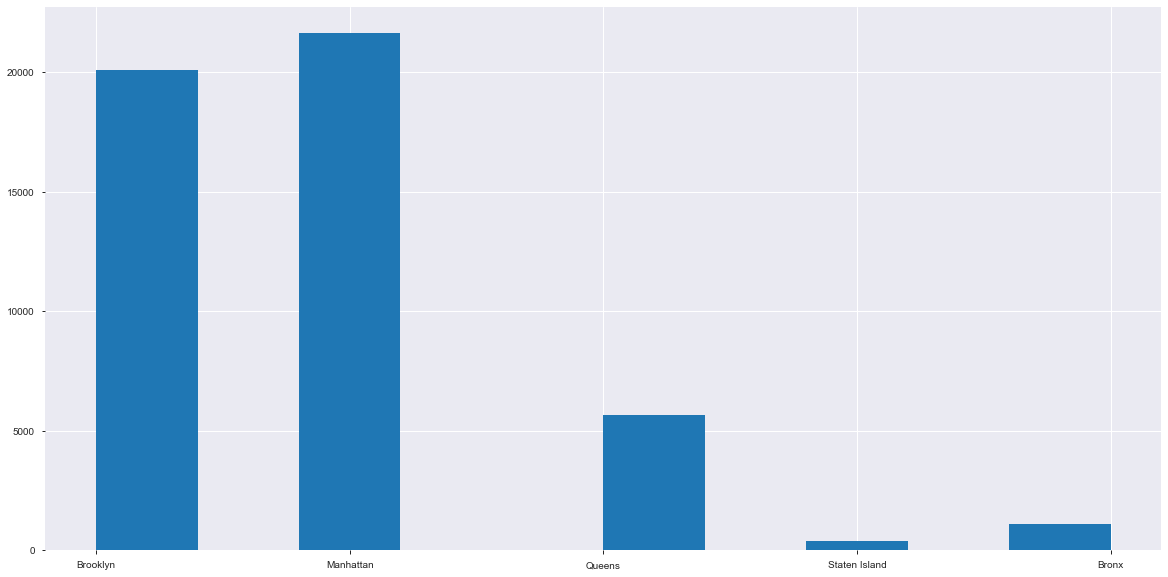

In [54]:
AB_NYC_2019.neighbourhood_group.hist(bins=10)

Creation d'un data frame en regroupant les donnée par Gros cartier

In [66]:
NYC_GR = AB_NYC_2019.groupby('neighbourhood_group').count()

In [67]:
NYC_GR.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [72]:
NYC_GR.price

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: price, dtype: int64

nombre de 'maison' dans chaque appartement

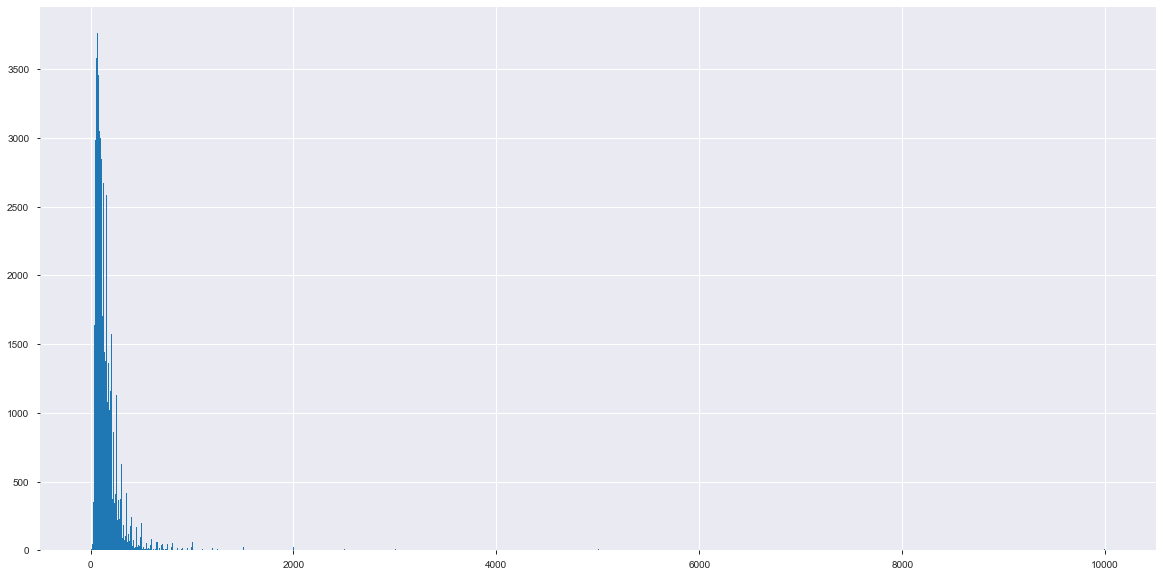

In [36]:
AB_NYC_2019.price.hist(bins=1000)

On observe une majorité de la concentration des prix autour des 400,500 dollars.
Nous decidons donc d'afficher l'histoigramme de ces valeurs

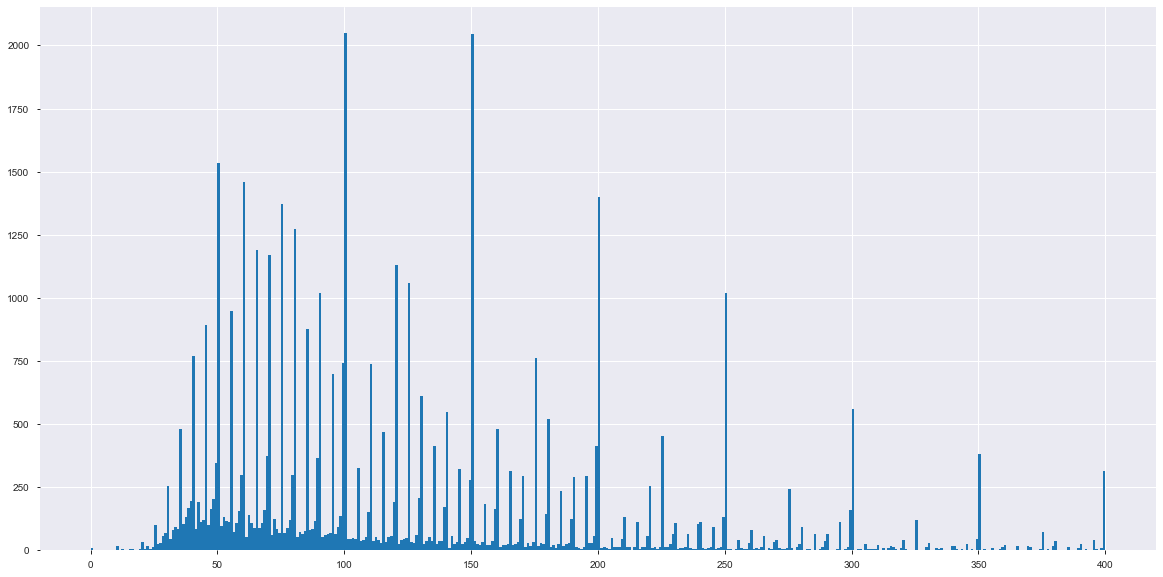

In [50]:
AB_NYC_2019.price[AB_NYC_2019.price<=400].hist(bins=400)  #globalité des prix < 400

In [70]:
#Précisons combien de données nous filtrons en ne regardant que les prix en dessous ou égal à 400 dollars
print(str(round(len(AB_NYC_2019.host_id[AB_NYC_2019.price > 400])/len(AB_NYC_2019)*100,2)) + '% des appartemant a louer pour + de 400 dollard')

3.61% des appartemant a louer pour + de 400 dollard


In [28]:
AB_NYC_2019.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [49]:
AB_NYC_2019.host_id.count()

48895

In [51]:
AB_NYC_2019.price[AB_NYC_2019.price<=400].count()

47132

In [69]:
AB_NYC_2019.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


In [78]:
plt.figure(1)

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

#### Impact sur le prix 

Analysez et commentez le rôle joué par les différentes variables sur le prix de location.

#### Corrélations 

Analysez et commentez les corrélations entre les différentes variables (quantitatives ? catégorielles ?).

#### Géographie

Proposez une analyse intéressante et visuelle grâce à la carte de NYC.

### Analyses complémentaires 

## Prédiction du prix 

### Preprocessing

Vous pouvez préprocesser les données / créer des nouvelles variables pertinentes.

### Modèles

Vous devrez tester différents models (en appliquant un split Train Test à 70%) pour comparer leurs précisions (Root Mean Square Error - RMSE) et les discriminer (Bayesian Information Criteria - BIC).

Il vous est demandé de traiter a minima un modèle linéaire, et un modèle à base d'arbres. Cherchez également à analyser l'importance des différentes variables dans vos modèles.

#### Modèle selectionné et résultats

Expliquez ici pourquoi vous choisissez un certain modèle et ses résultats.